In [ ]:
# BIRCH
# Spectral Clustering
# Affinity Propagation
# Mean-shift
# GMM (Gaussian Mixtrue Model)

In [ ]:
# 군집화 모델 특징
# K-medoid, K-means, 가우시안 혼합 모델, DBSCAN은 모델의 초기 상태에 따라 결과가 다름.
# 계층적 군집화는 동일한 결과가 보장
# K-medoid는 K-means에 비해 이상치에 robust한 성능을 보임.
# DBSCAN은 학습을 통해 군집의 수가 결정됨.

# DBSCAN(데이터 밀도)은 K-means(클러스터 형태에 민감)보다 이상치에 더 안정적 

# K-mean는 클러스터의 크기가 다른 경우는 잘 동작하지 않는다.
# 클러스터의 크기와 형태가 동일할 때 잘 동작한다.
# 유클리디언 거리를 사용하여 군집을 형성하므로 비선형적인 형태의 군집이나 크기가 매우 다른 군집을 잘 처리할 수 없다.
# distortion function(왜곡 함수, 군집 내 점들과 중심점 간의 제곱 거리의 합)이 감소하는 방향으로 군집이 형성된다.



In [ ]:
비지도 - 군집분석, 다차원척도, 주성분분석, SOM, OLAP 차원축소, 연관규칙분석, 
DBSCAN, Growth, Expectation 알고리즘, Apriori 알고리즘 (연관규칙), K-means 클러스터링(군집)

In [ ]:
비계층적 군집 : 예 k-means 군집은 군집의 수 k의 초기값을 설정
군집수를 미리 정의한다, k-평균, PAM, DBSCAN(밀도기반기법)

In [ ]:
# 계층적 군집화
# 군집의 수를 병합 과정을 통해 계층 구조를 완료한 후 설정할 수 있다.
# 연산량이 다른 군집화 모델에 비해 큰편
# ward linkage는 두 군집의 결합이 분산의 증가량을 최소화하는 방향으로 병합
# single linkage는 두 군집에 속한 데이터 포인트 중 거리가 가장 가까운 우선으로 병합

# 단일연결법은 두 군집 간의 거리를 가장 가까운 점들 간의 거리로 정의
# 이 방법은 군집 간의 연결을 비교적 좁은 범위에서 연결할 수 있다.

# 중앙연결법은 두 군집의 중심(평균) 간의 거리를 계산
# 군집 간의 중심을 비교하여 군집을 병합하는 방식

# 평균연결법 (Average Linkage, UPGMA)
# 두 군집 간 모든 점들 간의 거리의 평균을 군집 간 거리로 사용
# 이상치 영향을 상대적으로 적게 받음

# 완전연결법은 두 군집 간의 거리를 가장 먼 점들 간의 거리로 정의
# 이 방법은 군집의 최대 거리를 기준으로 병합을 진행

# 군집분석은 여러 번 수행해도 결과가 같다.

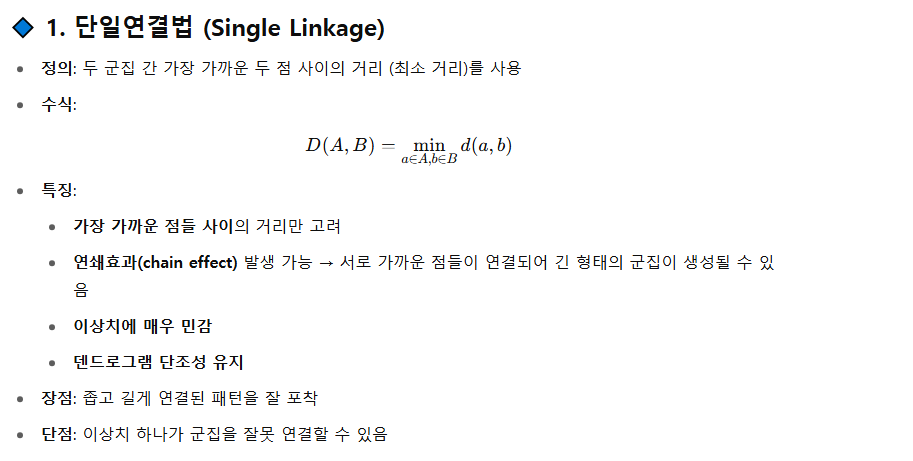
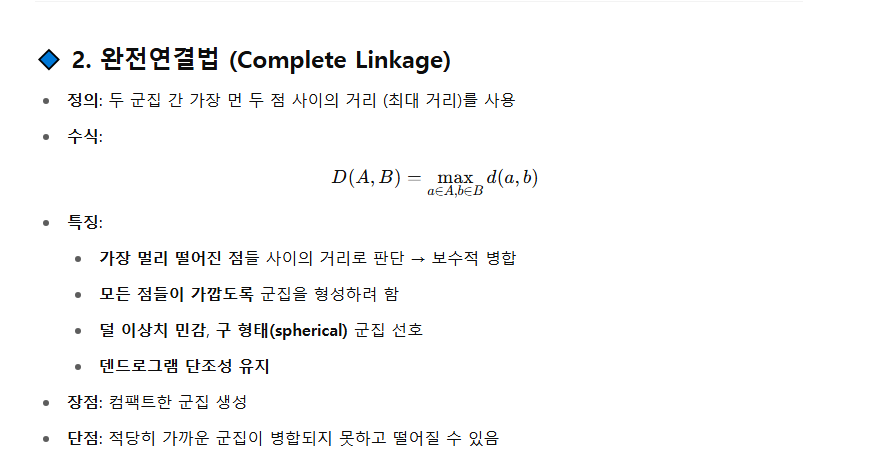
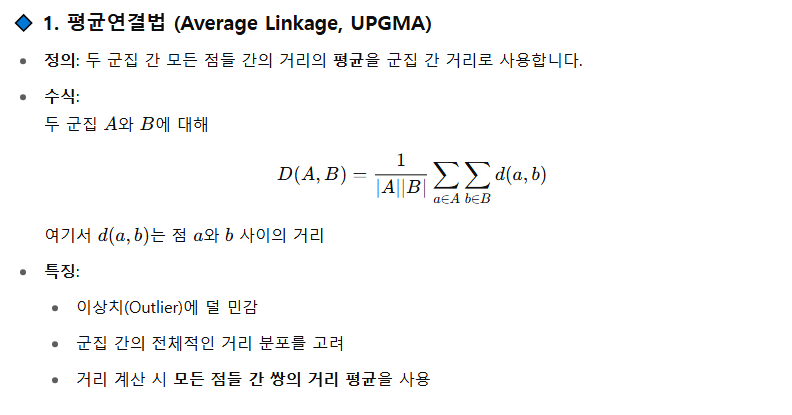
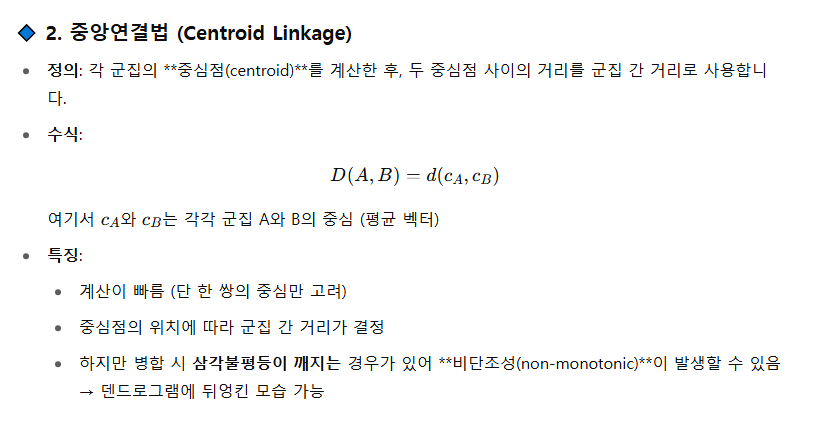
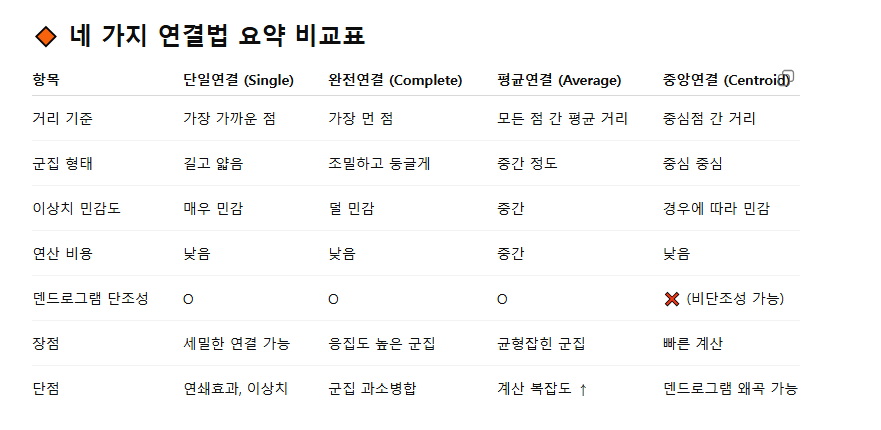

### 다음과 같은 distance matrix로 계층적 군집분석을 적용했을 때, 군집의 개수가 2개일 때 군집은? 
###  (single linkage를 사용)
|   | A | B | C | D | E |
| - | - | - | - | - | - |
| A | 0 | 1 | 2 | 3 | 4 |
| B |   | 0 | 3 | 4 | 5 |
| C |   |   | 0 | 4 | 5 |
| D |   |   |   | 0 | 1 |
| E |   |   |   |   | 0 |


In [ ]:
# Single Linkage Clustering 과정
# Step 1. 거리 1 → (A, B) 가장 가까움 → 군집 G1 = {A, B}
# Step 2. 다음 최소 거리 1 → (D, E) → 군집 G2 = {D, E}
# Step 3. 거리 2 → A–C = 2, 즉 G1(A,B)와 C의 최소 거리는 min(2, 3) = 2 → G1과 C 병합 → G3 = {A, B, C}
# Step 4. G2(D,E)와 G3(A,B,C) 사이 최소 거리 =

# D–A = 3, D–B = 4, D–C = 4

# E–A = 4, E–B = 5, E–C = 5
# → 최소 거리 = 3 (D–A)

# 따라서 다음 병합: G2와 G3 간 거리 = 3

# Step 5. 군집 개수 2개일 때:
# G3 = {A, B, C}
# G2 = {D, E}

In [ ]:
# 병합 군집
# ward - 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합친다. 크기가 비슷한 클러스터 생성
# average - 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다. (single, complete에 비해 이상치 영향이 적음)
# complete - 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합친다.
# single - 클러스터 포인트 사이의 최소 거리가 가장 짧은 두 클러스터를 합친다.

# 군집 분석은 여러번 해도 결과가 같다. 군집 분석을 여러번 한 후 평균을 내는 것은 의미가 없다.

In [ ]:
# Dunn Index (던 지수)
# 군집화의 품질을 평가하기 위한 지표 
# 군집 내의 데이터는 조밀하게 모여 있고, 군집 간의 거리는 멀리 떨어져 있어야 좋은 군집화

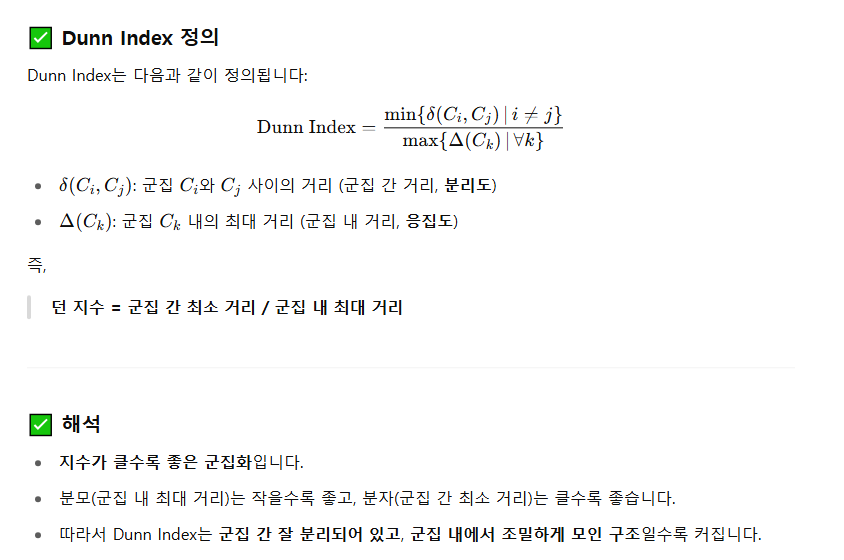
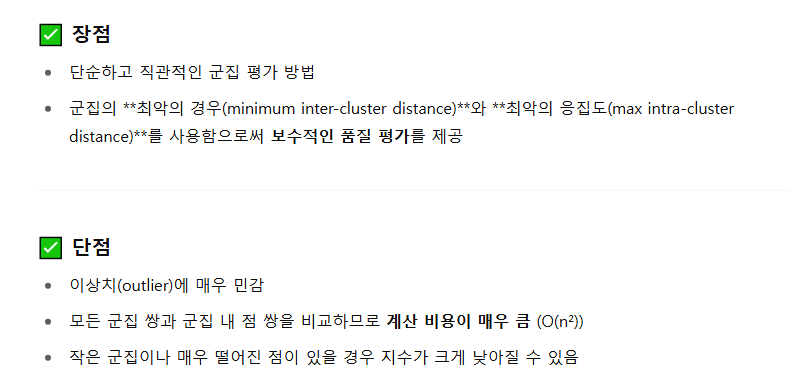

In [1]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import euclidean
import numpy as np

def dunn_index(X, labels):
    clusters = np.unique(labels)
    intra_dists = []
    inter_dists = []

    for c in clusters:
        points = X[labels == c]
        if len(points) > 1:
            dists = pairwise_distances(points)
            intra_dists.append(np.max(dists))
        else:
            intra_dists.append(0)  # 군집에 1개만 있는 경우는 거리 0

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            ci = X[labels == clusters[i]]
            cj = X[labels == clusters[j]]
            min_dist = np.min(pairwise_distances(ci, cj))
            inter_dists.append(min_dist)

    return min(inter_dists) / max(intra_dists)

# 예시 데이터
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

print("Dunn Index:", dunn_index(X, y))

Dunn Index: 1.320006837138542


In [ ]:
# SOM 기법
- 실제 공간의 입력 데이터의 거리가 가까우면 지도상에도 가깝게 위치된다.
- 고차원의 입력 데이터를 저차원의 뉴런으로 정렬하여 지도의 형태로 형상화한다.
- 입력층의 자료가 학습을 통하여 경쟁층에 정렬되는데, 이를 지도라고 부르며 각각의 뉴런은 완전 연결되어 있다.
- 그래프 기반으로 수행하는 [비지도 신경망]으로 자율학습에 의해 군집을 형성하는 방법이다.
